✅ Dataset cargado: (51696, 22)
      FLT     PLT FLC   FLN FST                 STA STD                 ETA  \
0   CM263   CM263  CM   263   J 2025-10-01 01:20:00 NaT 2025-10-01 01:10:00   
1  LP2451  LA2451  LP  2451   J 2025-10-01 06:40:00 NaT 2025-10-01 06:09:00   
2  LP2378  LA2378  LP  2378   J 2025-10-01 08:30:00 NaT 2025-10-01 08:09:00   

  ETD                 TDT  ... ABT GAT   TAR  TYP     REG  ORG  DES  TYS  CAN  \
0 NaT 2025-10-01 01:05:00  ... NaT  C1  301L  737  HP1722  PTY  NaN  738  NaN   
1 NaT 2025-10-01 06:13:00  ... NaT  C4  401R  320   CCBFH  PUJ  NaN  32A  NaN   
2 NaT 2025-10-01 08:07:00  ... NaT  C8  402R  320   CCBFG  SCL  NaN  32A  NaN   

   TOF  
0  ARR  
1  ARR  
2  ARR  

[3 rows x 22 columns]


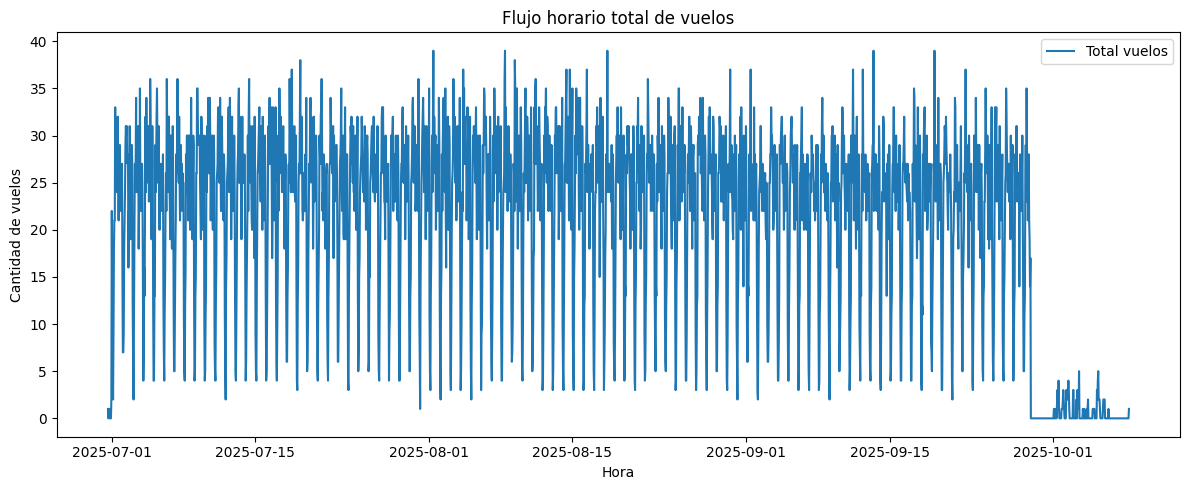

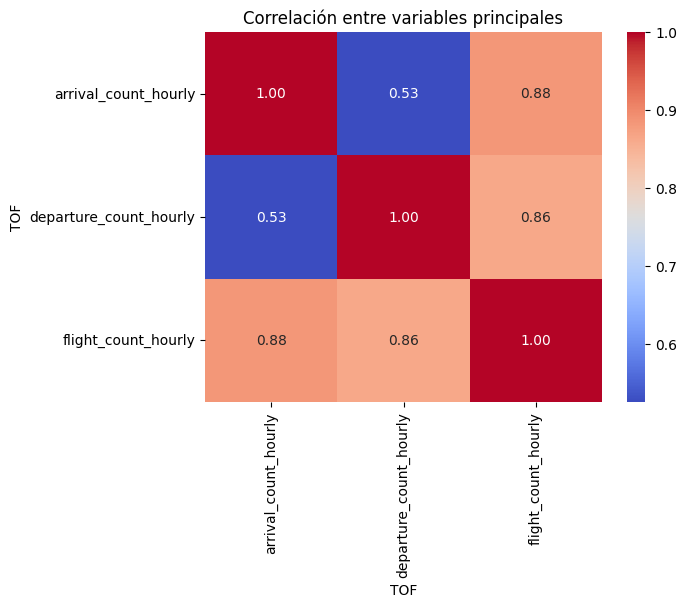

✅ Secuencias creadas: (2371, 24, 12)
Train (1659, 24, 12), Val (356, 24, 12), Test (356, 24, 12)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 24, 128)        │        72,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,825 (491.50 KB)

 Trainable params: 125,825 (491.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
52/52 - 6s - 117ms/step - loss: 0.3690 - mae: 0.4780 - val_loss: 0.1415 - val_mae: 0.3025 - learning_rate: 1.0000e-03
Epoch 2/100
52/52 - 2s - 42ms/step - loss: 0.1636 - mae: 0.3176 - val_loss: 0.1212 - val_mae: 0.2740 - learning_rate: 1.0000e-03
Epoch 3/100
52/52 - 3s - 62ms/step - loss: 0.1382 - mae: 0.2950 - val_loss: 0.1087 - val_mae: 0.2624 - learning_rate: 1.0000e-03
Epoch 4/100
52/52 - 3s - 49ms/step - loss: 0.1256 - mae: 0.2831 - val_loss: 0.1018 - val_mae: 0.2520 - learning_rate: 1.0000e-03
Epoch 5/100
52/52 - 2s - 41ms/step - loss: 0.1242 - mae: 0.2812 - val_loss: 0.1047 - val_mae: 0.2539 - learning_rate: 1.0000e-03
Epoch 6/100
52/52 - 2s - 46ms/step - loss: 0.1266 - mae: 0.2839 - val_loss: 0.1155 - val_mae: 0.2699 - learning_rate: 1.0000e-03
Epoch 7/100
52/52 - 2s - 45ms/step - loss: 0.1187 - mae: 0.2742 - val_loss: 0.1178 - val_mae: 0.2718 - learning_rate: 1.0000e-03
Epoch 8/100
52/52 - 4s - 73ms/step - loss: 0.1189 - mae: 0.2735 - val_loss: 0.1047 - val_mae: 0.

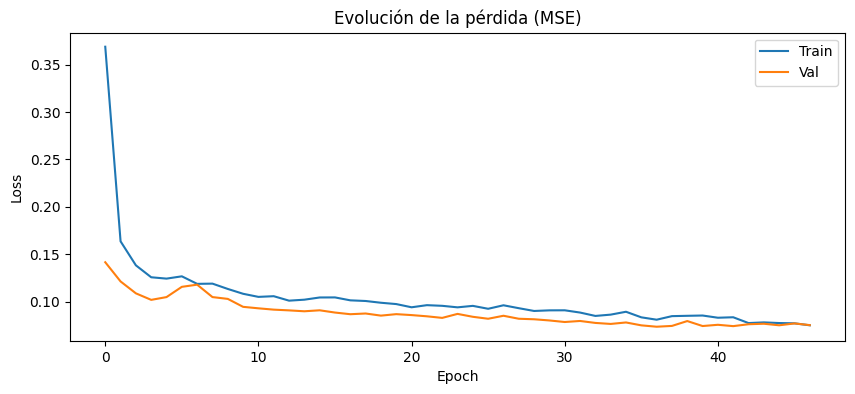

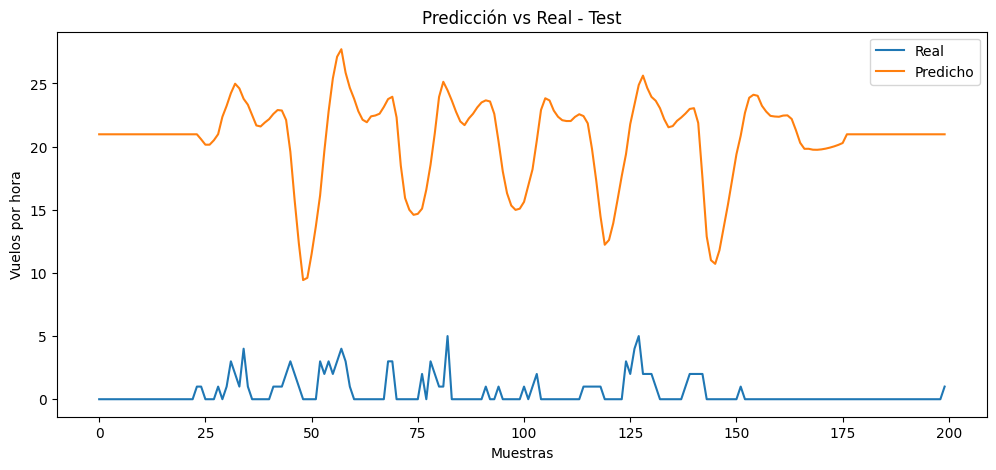

✅ Modelo y escaladores guardados correctamente.


In [7]:
# ======================================================
# 🔹 MODELADO DE FLUJO HORARIO DE VUELOS CON LSTM
# ======================================================

# 1️⃣ Importar librerías
# ------------------------------------------------------
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

# Reproducibilidad
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# 2️⃣ Cargar y limpiar el dataset
# ------------------------------------------------------
url = "https://raw.githubusercontent.com/anterotello/IA/main/data/raw/Dataset%20-%20Flujo%20horario.xlsx"
df = pd.read_excel(url)

print("✅ Dataset cargado:", df.shape)
print(df.head(3))

# Limpieza básica
df = df.drop_duplicates().reset_index(drop=True)
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

# Conversión de fechas
datetime_cols = ['STA', 'STD', 'ETA', 'ETD', 'ATA', 'ATD', 'TDT', 'ABT']
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# Crear variable base "hour"
df['hour'] = np.where(
    df['TOF'].str.upper() == 'ARR',
    df['ETA'].dt.floor('h'),
    df['ETD'].dt.floor('h')
)

# 3️⃣ Crear dataset de flujo horario
# ------------------------------------------------------
flow_by_hour = (
    df.groupby(['hour', 'TOF'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={'ARR': 'arrival_count_hourly', 'DEP': 'departure_count_hourly'})
    .reset_index()
)

# Totales y features temporales
flow_by_hour['flight_count_hourly'] = (
    flow_by_hour.get('arrival_count_hourly', 0) + flow_by_hour.get('departure_count_hourly', 0)
)
flow_by_hour['hour_of_day'] = flow_by_hour['hour'].dt.hour
flow_by_hour['weekday'] = flow_by_hour['hour'].dt.weekday
flow_by_hour['month'] = flow_by_hour['hour'].dt.month

# Features cíclicas
flow_by_hour['hour_sin'] = np.sin(2 * np.pi * flow_by_hour['hour_of_day'] / 24)
flow_by_hour['hour_cos'] = np.cos(2 * np.pi * flow_by_hour['hour_of_day'] / 24)
flow_by_hour['weekday_sin'] = np.sin(2 * np.pi * flow_by_hour['weekday'] / 7)
flow_by_hour['weekday_cos'] = np.cos(2 * np.pi * flow_by_hour['weekday'] / 7)
flow_by_hour['month_sin'] = np.sin(2 * np.pi * flow_by_hour['month'] / 12)
flow_by_hour['month_cos'] = np.cos(2 * np.pi * flow_by_hour['month'] / 12)

# 4️⃣ Enriquecer con variables adicionales simuladas (si no existen)
# ------------------------------------------------------
for extra_col in ['gate_usage_rate', 'airline_activity_index', 'aircraft_mix_index', 'turnaround_overlap']:
    if extra_col not in flow_by_hour.columns:
        flow_by_hour[extra_col] = np.random.uniform(0, 1, len(flow_by_hour))

# 5️⃣ Reindexar con frecuencia horaria continua
# ------------------------------------------------------
fbh = flow_by_hour.copy()
if 'hour' not in fbh.columns:
    if fbh.index.name == 'hour':
        fbh = fbh.reset_index()
    else:
        raise KeyError("⚠️ No se encontró la columna 'hour'.")

fbh = fbh.sort_values('hour').reset_index(drop=True)
fbh = fbh.set_index('hour').asfreq('h')  # usar 'h' (no 'H')
fbh = fbh.fillna(0).reset_index()

# 6️⃣ Exploración visual
# ------------------------------------------------------
plt.figure(figsize=(12,5))
sns.lineplot(data=fbh, x='hour', y='flight_count_hourly', label='Total vuelos')
plt.title('Flujo horario total de vuelos')
plt.xlabel('Hora')
plt.ylabel('Cantidad de vuelos')
plt.legend()
plt.tight_layout()
plt.show()

sns.heatmap(
    fbh[['arrival_count_hourly','departure_count_hourly','flight_count_hourly']].corr(),
    annot=True, cmap='coolwarm', fmt='.2f'
)
plt.title("Correlación entre variables principales")
plt.show()

# 7️⃣ Preparación para el modelo LSTM
# ------------------------------------------------------
feature_cols = [
    'arrival_count_hourly', 'departure_count_hourly',
    'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos',
    'month_sin', 'month_cos', 'gate_usage_rate',
    'airline_activity_index', 'aircraft_mix_index', 'turnaround_overlap'
]
feature_cols = [c for c in feature_cols if c in fbh.columns]
TARGET = 'flight_count_hourly'

X_all = fbh[feature_cols].values
y_all = fbh[[TARGET]].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_all)
y_scaled = scaler_y.fit_transform(y_all)

# Crear secuencias para LSTM
def create_sequences(X, y, lookback=24, horizon=1):
    Xs, ys = [], []
    for i in range(lookback, len(X) - horizon + 1):
        Xs.append(X[i-lookback:i])
        ys.append(y[i + horizon - 1])
    return np.array(Xs), np.array(ys)

LOOKBACK, HORIZON = 24, 1
X_seq, y_seq = create_sequences(X_scaled, y_scaled, LOOKBACK, HORIZON)
print("✅ Secuencias creadas:", X_seq.shape)

# División temporal train/val/test
n = len(X_seq)
train_end, val_end = int(n*0.7), int(n*0.85)
X_train, y_train = X_seq[:train_end], y_seq[:train_end]
X_val, y_val = X_seq[train_end:val_end], y_seq[train_end:val_end]
X_test, y_test = X_seq[val_end:], y_seq[val_end:]
print(f"Train {X_train.shape}, Val {X_val.shape}, Test {X_test.shape}")

# 8️⃣ Construcción del modelo LSTM
# ------------------------------------------------------
def build_lstm_model(input_shape, units=128, dropout=0.3, lr=1e-3):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(units, return_sequences=True),
        layers.Dropout(dropout),
        layers.LSTM(units//2),
        layers.Dropout(dropout),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=lr), loss='mse', metrics=['mae'])
    return model

model = build_lstm_model((LOOKBACK, X_train.shape[2]))
model.summary()

# 9️⃣ Entrenamiento
# ------------------------------------------------------
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
ckpt = callbacks.ModelCheckpoint("best_lstm_model.keras", save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[es, rlr, ckpt],
    verbose=2
)

# 🔟 Evaluación
# ------------------------------------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"\n📈 Test MAE: {mae:.3f} | RMSE: {rmse:.3f}")

# Visualización de resultados
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Evolución de la pérdida (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(y_true[-200:].flatten(), label='Real')
plt.plot(y_pred[-200:].flatten(), label='Predicho')
plt.title('Predicción vs Real - Test')
plt.xlabel('Muestras')
plt.ylabel('Vuelos por hora')
plt.legend()
plt.show()

# ------------------------------------------------------
# 10️⃣ Guardar modelo y escaladores
# ------------------------------------------------------
model.save("lstm_flow_model_final.keras")  # ✅ formato moderno

import joblib
joblib.dump(scaler_X, "scaler_X.save")
joblib.dump(scaler_y, "scaler_y.save")

print("✅ Modelo y escaladores guardados correctamente.")

